In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [5]:
train.shape

(304887, 12)

In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


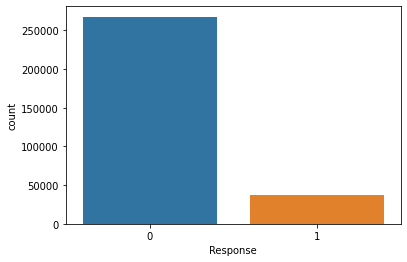

In [7]:
sns.countplot(train.Response)
#Imbalance

In [8]:
train.Response.value_counts()

0    267582
1     37305
Name: Response, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


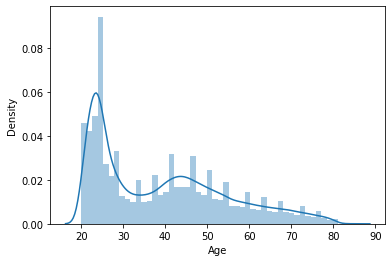

In [9]:
sns.distplot(train.Age)
#Right skewed

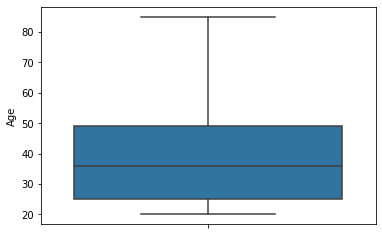

In [10]:
sns.boxplot(y = 'Age', data = train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


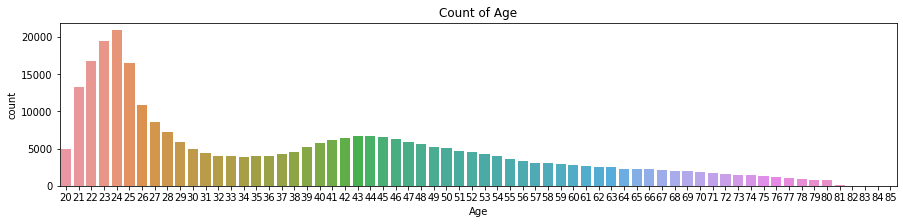

In [11]:
plt.figure(figsize = (15,3))
sns.countplot(train['Age'])
plt.title('Count of Age')
plt.show()
#Age 24 wale sabse zyada hai data mein

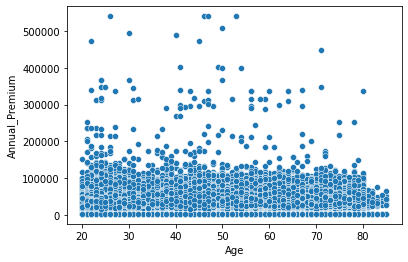

In [12]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


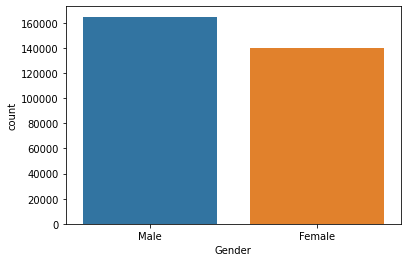

In [13]:
sns.countplot(train.Gender)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


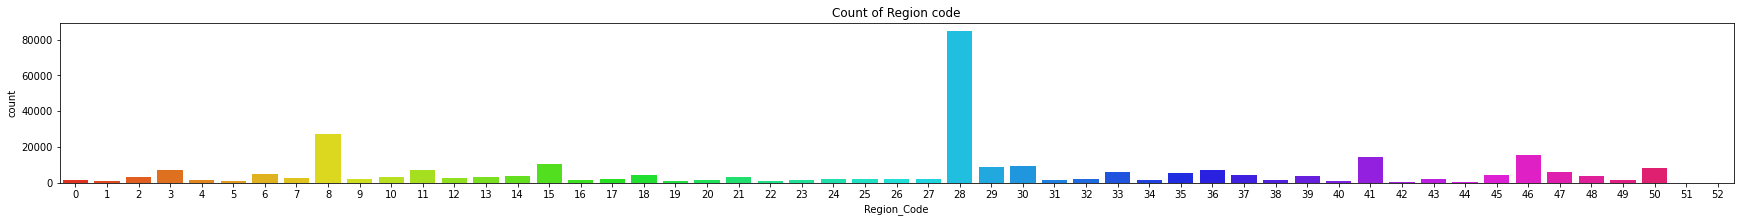

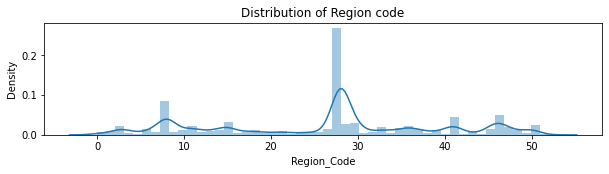

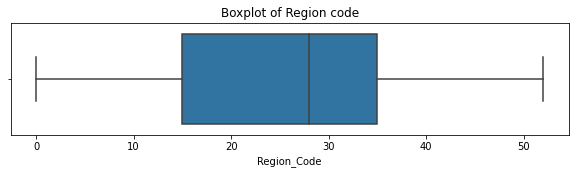

In [14]:
plt.figure(figsize = (30,10))
plt.subplot(3,1,1)
sns.countplot(train['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()
#No outliers
#Region 28 wale log sabse zyada hai

Percentage of  Driving_License feature
 
1    99.787462
0     0.212538
Name: Driving_License, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


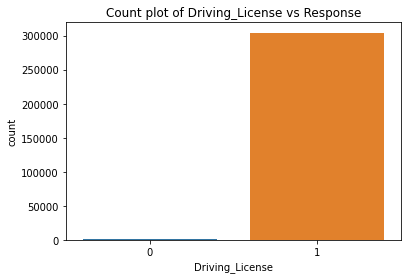

In [15]:
print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)
plt.title("Count plot of Driving_License vs Response")
sns.countplot(train['Driving_License'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


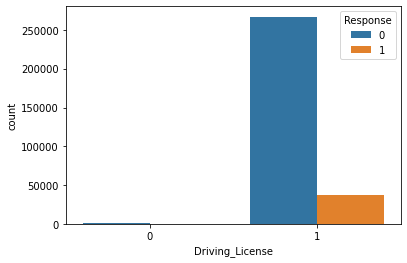

In [16]:
sns.countplot(train['Driving_License'], hue = train['Response'])
#99 percent ppl have driving license 
#Interested in insurance majority people have license

Percentage ofPreviously_Insured feature
 
0    54.156458
1    45.843542
Name: Previously_Insured, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


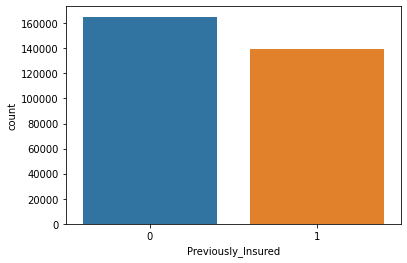

In [17]:
print("Percentage ofPreviously_Insured feature\n ")
print(train['Previously_Insured'].value_counts()/len(train)*100)
sns.countplot(train['Previously_Insured'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


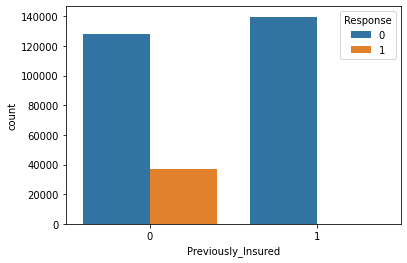

In [18]:
sns.countplot(train['Previously_Insured'], hue = train['Response'])
#Previously insured are most likely to be interested

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


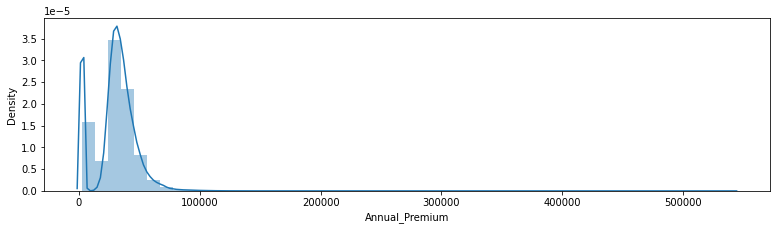

In [19]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


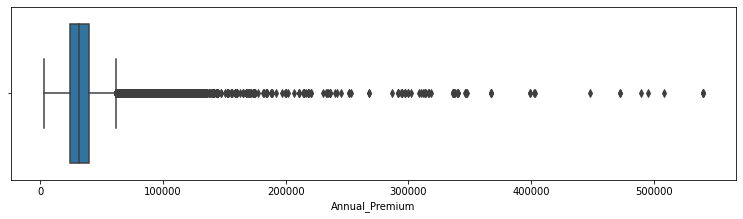

In [20]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


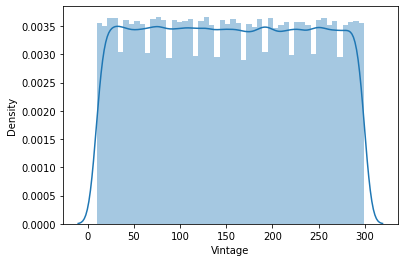

In [21]:
sns.distplot(train['Vintage'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


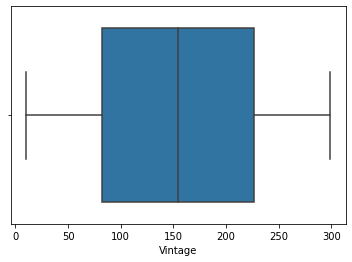

In [22]:
sns.boxplot(train['Vintage'])

In [23]:
gender = pd.get_dummies(train["Gender"],drop_first= True)
vehicle_age = pd.get_dummies(train["Vehicle_Age"],drop_first= True)
vehicle_damage = pd.get_dummies(train["Vehicle_Damage"],drop_first= True)
driving_license = pd.get_dummies(train["Driving_License"],drop_first= True)

In [24]:
train = pd.concat([train, gender, vehicle_age, vehicle_damage, driving_license], axis = 1)

In [25]:
train = train.drop(["Gender", "Vehicle_Age", "Vehicle_Damage", "Driving_License"], axis = 1)

In [26]:
train.drop('id', axis = 1, inplace = True)

In [27]:
train.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes,1
0,50,41,0,35915,124,240,0,1,0,0,1,1
1,48,28,0,26873,124,274,0,0,0,0,1,1
2,34,41,0,2630,156,138,1,0,0,0,1,1
3,43,28,0,46877,124,223,0,0,0,0,1,1
4,29,28,1,38009,152,106,0,1,1,0,0,1


In [28]:
#gr_age = []
#for i, kolom in train.iterrows():
#    if kolom['Age'] >= 20 and kolom['Age'] <= 29:
#        segment = 1
#    elif kolom['Age'] >= 30 and kolom['Age'] <= 39:
#        segment = 2
#    elif kolom['Age'] >= 40 and kolom['Age'] <= 49:
#        segment = 3
#    elif kolom['Age'] >= 50 and kolom['Age'] <= 59:
#        segment = 4
#    elif kolom['Age'] >= 60 and kolom['Age'] <= 69:
#        segment = 5
#    elif kolom['Age'] >= 70 and kolom['Age'] <= 85:
#        segment = 6
#    else:
#        segment = 7
#    gr_age.append(segment)
    
#train['Group_Age'] = gr_age
#train.head()
#HAd formed bins for age wasnt giving good results

In [29]:
#GroupAge = pd.get_dummies(train["Group_Age"],drop_first= True)
#One hot for age grp bins

In [30]:
#train = pd.concat([train,GroupAge], axis = 1)

In [31]:
#train = train.drop(['Age','Group_Age'], axis=1)

In [32]:
#Had tried isolation forest for outlier removal 
#iso = IsolationForest(warm_start=True, n_jobs=-1)
#iso.fit_predict(train.drop('Response', axis=1))
#iso_pred = iso.predict(train.drop('Response', axis=1))

In [33]:
#iso_pred = np.where(iso_pred==1, 0, iso_pred)
#iso_pred = np.where(iso_pred==-1, 1, iso_pred)
#iso_pred = np.array(iso_pred, dtype=bool)
#print(np.unique(iso_pred, return_counts=True))

In [34]:
#train_reduced = train.loc[iso_pred]

In [35]:
#train_reduced

In [36]:
#Y= train_reduced['Response']
#X= train_reduced.drop('Response',axis=1)

#print('X shape :',X.shape)
#print('y shape :',Y.shape)

In [37]:
print(f'Count of rows before filtering outlier: {len(train)}')
filtered_entries = np.array([True] * len(train))
for col in ['Annual_Premium']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries
    
train = train[filtered_entries]

print(f'Count of rows after filtering outlier: {len(train)}')
#Using quartile range to remove outliers

Count of rows before filtering outlier: 304887
Count of rows after filtering outlier: 296578


In [38]:
Y= train['Response']
X= train.drop('Response',axis=1)

print('X shape :',X.shape)
print('y shape :',Y.shape)

X shape : (296578, 11)
y shape : (296578,)


In [39]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Male,< 1 Year,> 2 Years,Yes,1
0,0.461538,0.788462,0.0,0.561876,0.759259,0.795848,1.0,0.0,0.0,1.0,1.0
1,0.430769,0.538462,0.0,0.409241,0.759259,0.913495,0.0,0.0,0.0,1.0,1.0
2,0.215385,0.788462,0.0,0.000000,0.956790,0.442907,0.0,0.0,0.0,1.0,1.0
3,0.353846,0.538462,0.0,0.746923,0.759259,0.737024,0.0,0.0,0.0,1.0,1.0
4,0.138462,0.538462,1.0,0.597225,0.932099,0.332180,1.0,1.0,0.0,0.0,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


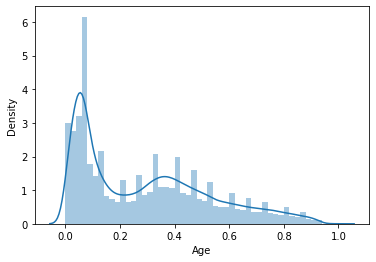

In [40]:
sns.distplot(X.Age)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


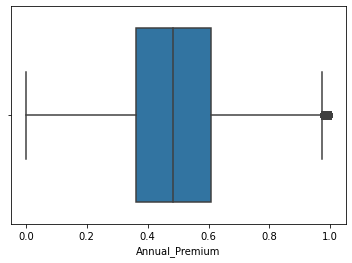

In [41]:
sns.boxplot(X.Annual_Premium)

In [42]:
from sklearn.model_selection import train_test_split
x_train_res,x_test,y_train_res,y_test = train_test_split(X,Y,test_size = 0.2)

In [43]:
#Treated imbalance data set by oversampling but this wasnt giving accurate results for the test csv
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 2) 
#x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [44]:
#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [45]:
test.drop('id', axis = 1, inplace = True)

In [46]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [47]:
gender = pd.get_dummies(test["Gender"],drop_first= True)
vehicle_age = pd.get_dummies(test["Vehicle_Age"],drop_first= True)
vehicle_damage = pd.get_dummies(test["Vehicle_Damage"],drop_first= True)
driving_license = pd.get_dummies(test["Driving_License"],drop_first= True)

In [48]:
test = pd.concat([test, gender, vehicle_age, vehicle_damage, driving_license], axis = 1)

In [49]:
#gr_age = []
#for i, kolom in test.iterrows():
#    if kolom['Age'] >= 20 and kolom['Age'] <= 29:
#        segment = 1
#    elif kolom['Age'] >= 30 and kolom['Age'] <= 39:
#        segment = 2
#    elif kolom['Age'] >= 40 and kolom['Age'] <= 49:
#        segment = 3
#    elif kolom['Age'] >= 50 and kolom['Age'] <= 59:
#        segment = 4
#    elif kolom['Age'] >= 60 and kolom['Age'] <= 69:
#        segment = 5
#    elif kolom['Age'] >= 70 and kolom['Age'] <= 85:
#        segment = 6
#    else:
#        segment = 7
#    gr_age.append(segment)
    
#test['Group_Age'] = gr_age
#test.head()

In [50]:
#GroupAge = pd.get_dummies(test["Group_Age"],drop_first= True)
#test = pd.concat([test,GroupAge], axis = 1)

In [51]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Male,< 1 Year,> 2 Years,Yes,1
0,Male,31,1,18,0,1-2 Year,Yes,2630,156,152,1,0,0,1,1
1,Female,24,1,15,1,< 1 Year,No,28105,152,267,0,1,0,0,1
2,Female,25,1,14,1,< 1 Year,No,29302,152,139,0,1,0,0,1
3,Male,49,1,28,0,1-2 Year,Yes,28357,26,12,1,0,0,1,1
4,Male,55,1,45,0,1-2 Year,Yes,33288,26,44,1,0,0,1,1


In [52]:
test = test.drop(["Gender", "Vehicle_Age", "Vehicle_Damage", "Driving_License"], axis = 1)

In [53]:
test = (test - np.min(test)) / (np.max(test) - np.min(test)).values
test.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Male,< 1 Year,> 2 Years,Yes,1
0,0.169231,0.346154,0.0,0.000000,0.956790,0.491349,1.0,0.0,0.0,1.0,1.0
1,0.061538,0.288462,1.0,0.054270,0.932099,0.889273,0.0,1.0,0.0,0.0,1.0
2,0.076923,0.269231,1.0,0.056820,0.932099,0.446367,0.0,1.0,0.0,0.0,1.0
3,0.446154,0.538462,0.0,0.054807,0.154321,0.006920,1.0,0.0,0.0,1.0,1.0
4,0.538462,0.865385,0.0,0.065311,0.154321,0.117647,1.0,0.0,0.0,1.0,1.0


In [54]:
param = { 'depth':[3,1,2,6,4,8,9,10,20,30,50],
         'iterations':[250,100,500,1000],
         'learning_rate':[0.03,0.001,0.01,0.1,0.13,0.2,0.3],
         'l2_leaf_reg':[3,1,5,10,100],
         'border_count':[32,5,10,20,100,200]
        }

In [55]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

     |████████████████████████████████| 65.8MB 63kB/s 


In [56]:
#from sklearn.model_selection import RandomizedSearchCV

#randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
#randm.fit(X,Y)
#print("\n The best parameters across ALL searched params:\n",randm.best_params_)

#Choosing hyperparas for data when there is no split and oversampling directly fitting training data set to model (for catboost)

In [57]:
#from sklearn.model_selection import RandomizedSearchCV

#randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
#randm.fit(x_train_res,y_train_res)
#print("\n The best parameters across ALL searched params:\n",randm.best_params_)

#Finsing best hyperparas for data with train test split and oversampling (catboost)

In [58]:
#The best parameters across ALL searched params:
 #{'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 2, 'border_count': 200}

In [59]:
catt = CatBoostClassifier(learning_rate= 0.1, l2_leaf_reg = 5, iterations = 1000, depth= 2, border_count= 200)
#Best params for train test split plus oversampling

In [60]:
cat2 =  CatBoostClassifier(learning_rate = 0.13, l2_leaf_reg =  5, iterations = 100, depth = 8, border_count = 5)
#best params for direct training data as input for training the model, no oversamp or train test split

In [61]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score 
#param_grid = {'max_depth': np.arange(3, 10),'criterion' : ['gini','entropy'],'max_leaf_nodes': [5,10,50,100],'min_samples_split': [2, 5, 10, 20]}
#grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
#grid_tree.fit(x_train_res, y_train_res)
#np.abs(grid_tree.best_score_)
#test the accuracy of all the combination of the parameters, then output the highest parameter.
#print(grid_tree.best_estimator_)

In [62]:
dtt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
#Params for train test split plus oversamp

In [66]:
#from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score
#!pip install optuna
#import optuna
#from optuna.samplers import TPESampler
from lightgbm import LGBMClassifier
#def create_model(trial):
#    n_estimators = trial.suggest_int('n_estimators',100,500)
#    num_leaves = trial.suggest_int('num_leaves',10,500)
#    max_depth = trial.suggest_int('max_depth',4,20)
#    learning_rate = trial.suggest_uniform('learning_rate',0.0001,1)
#    min_child_samples = trial.suggest_int('min_child_samples',10,50)
#    model = LGBMClassifier(n_estimators=n_estimators,num_leaves=num_leaves,
#    max_depth=max_depth,learning_rate=learning_rate,min_child_samples=min_child_samples)
#    return model

#def objective(trial):
#    model = create_model(trial)
#    model.fit(X,Y)
#    score = roc_auc_score(y_test,model.predict(x_test))
#    return score

#sampler = TPESampler(seed=42)
#study = optuna.create_study(sampler=sampler,direction='maximize')
#study.optimize(objective,n_trials=60)

#To get best hyperparams for Lightgbm for the whole training data as input without oversamp and train test split
#For train test + oversamp take x_train_res and y_train_res as input for model.fit here

In [67]:
#LGBM Classifier hyperparas for train test + oversamp
#{'n_estimators': 137, 'num_leaves': 329, 'max_depth': 5, 'learning_rate': 0.39983175225014567, 'min_child_samples': 45}

In [68]:
lg = LGBMClassifier(n_estimators = 137, num_leaves= 329, max_depth =  5, learning_rate= 0.39983175225014567, min_child_samples= 45)

In [69]:
lg2 = LGBMClassifier(n_estimators = 234, num_leaves =  498, max_depth = 18, learning_rate = 0.38598673398420036, min_child_samples = 35)
#For training data as a whole as input + no oversamp or train test split

In [70]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from lightgbm import LGBMClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 122)

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
#from sklearn.model_selection import RandomizedSearchCV


#log_params = {"penalty": ['l2'], 
#             'C': [ 0.5, 0.01, 0.1, 1, 2],
#             'solver' : ['newton-cg', 'lbfgs', 'sag'],
#             'max_iter': [300]}

#grid_log = RandomizedSearchCV(LogisticRegression(), log_params, n_jobs=3, cv = 5,return_train_score=True, scoring = 'f1_weighted')
#grid_log.fit(X,Y)

#To get best params for logisitic with input as the whole training data without oversamp or train test split

In [75]:
#grid_log.best_params_

In [76]:
lr2 = LogisticRegression(C = 0.1, max_iter = 300, penalty= 'l2', solver ='newton-cg')
#best params for logisitc for training data as whole for ip

In [77]:
estimator = []  
estimator.append(('lg', lg2))
estimator.append(('cat', cat2))
#voting classifier inputs can set diff combinations of classifiers here and check results my range is bet 82-87 percent accuracy for all classifiers defined above

In [78]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 

In [79]:
vot_hard.fit(X,Y) 
#if using oversamp+ train test split use x_train_res and y_train_res

0:	learn: 0.6155590	total: 117ms	remaining: 11.6s
1:	learn: 0.5553257	total: 178ms	remaining: 8.74s
2:	learn: 0.5077606	total: 243ms	remaining: 7.86s
3:	learn: 0.4694953	total: 307ms	remaining: 7.37s
4:	learn: 0.4383547	total: 375ms	remaining: 7.12s
5:	learn: 0.4123789	total: 448ms	remaining: 7.02s
6:	learn: 0.3911781	total: 515ms	remaining: 6.84s
7:	learn: 0.3732710	total: 583ms	remaining: 6.71s
8:	learn: 0.3580030	total: 648ms	remaining: 6.55s
9:	learn: 0.3451421	total: 713ms	remaining: 6.42s
10:	learn: 0.3344110	total: 777ms	remaining: 6.29s
11:	learn: 0.3253457	total: 845ms	remaining: 6.2s
12:	learn: 0.3173789	total: 909ms	remaining: 6.09s
13:	learn: 0.3107100	total: 972ms	remaining: 5.97s
14:	learn: 0.3048418	total: 1.04s	remaining: 5.87s
15:	learn: 0.3000657	total: 1.1s	remaining: 5.79s
16:	learn: 0.2957303	total: 1.17s	remaining: 5.69s
17:	learn: 0.2918368	total: 1.23s	remaining: 5.6s
18:	learn: 0.2888080	total: 1.28s	remaining: 5.45s
19:	learn: 0.2860728	total: 1.35s	remaining:

VotingClassifier(estimators=[('lg',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.38598673398420036,
                                             max_depth=18, min_child_samples=35,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=234, n_jobs=-1,
                                             num_leaves=498, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
                                     

In [80]:
y_pred = vot_hard.predict(test)

In [81]:
output = pd.DataFrame({'Response': y_pred})
output.to_csv('my_submission.csv', index=False)